In [1]:
#import data tools 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#Read the data
paris_df=pd.read_csv('ParisHousing.csv')
paris_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [3]:
#Only focus on Paris  code
code_df=paris_df.loc[(paris_df['cityCode']>=75000) & (paris_df['cityCode']<=76000)]
code_df


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
292,2523,12,1,1,67,75753,3,10,2015,1,1,150,473,949,1,1,260710.5
388,21297,71,1,1,14,75154,2,3,1995,1,1,8198,4951,111,0,4,2136801.5
454,70576,66,1,0,7,75420,4,7,2013,0,0,6411,6596,684,1,9,7061024.3
520,85429,60,1,1,57,75588,7,6,2016,1,1,1421,6473,405,0,8,8553293.6
683,23127,72,1,1,98,75970,5,4,1995,0,1,7989,4396,237,0,8,2327821.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,82557,76,1,1,85,75533,4,8,2013,0,1,2948,5016,697,0,3,8262789.3
9831,19219,26,0,1,11,75287,2,10,1994,0,1,2900,6325,383,0,0,1926624.4
9854,92075,45,1,1,39,75562,8,6,2005,1,0,3320,1744,211,1,2,9216323.5
9860,50380,51,1,0,89,75593,7,4,2013,0,0,3042,8945,733,1,9,5047474.3


In [12]:
# get the 1st,50th and 100th rows
# Columms squaremeters, number of rooms, floors 
sub=code_df.iloc[[0,50,99],[0,1,4]]
sub

,squareMeters,numberOfRooms,floors
292,2523,12,67
5754,23376,9,43
9889,2671,28,42


In [14]:
print(code_df.iloc[[0,50,99],[0,1,4]])

      squareMeters  numberOfRooms  floors
292           2523             12      67
5754         23376              9      43
9889          2671             28      42


In [28]:
multi_group_var=paris_df.groupby(['squareMeters', 'numberOfRooms']) [['floors','cityCode']].mean()
multi_group_var.head()


,,floors,cityCode
squareMeters,numberOfRooms,,
89,33,72.0,61648.0
111,32,34.0,80623.0
123,61,1.0,33633.0
128,38,6.0,8862.0
137,32,47.0,40384.0


In [29]:
global_square=paris_df.groupby('squareMeters')['price'].mean()
print(global_square)

squareMeters
89          10313.5
111         14431.3
123         13229.1
128         15488.0
137         21201.1
            ...    
99918    10002945.0
99932     9994093.4
99952     9998411.0
99985    10004278.3
99999    10006771.2
Name: price, Length: 9483, dtype: float64


<AxesSubplot:xlabel='squareMeters'>

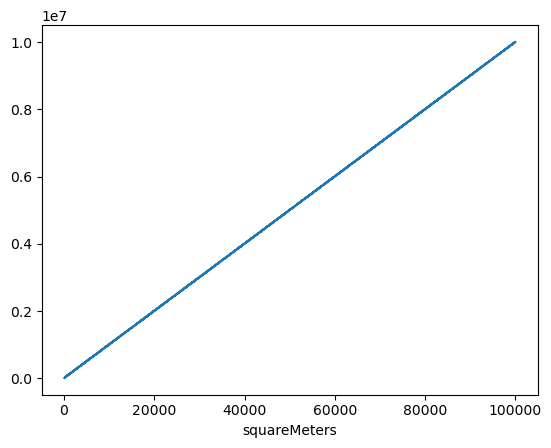

In [30]:
global_square.plot()
print